In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import itertools
import os 

In [68]:
full_data = pd.read_csv("/Users/nehasheth/Desktop/Sem 1/Data, Stats /Loan Default Prediction/Code/clean data/full_clean_data.csv")
sample_data = pd.read_csv("/Users/nehasheth/Desktop/Sem 1/Data, Stats /Loan Default Prediction/Code/clean data/sample_clean_data.csv")

In [2]:
application_data = pd.read_csv("/Users/nehasheth/Desktop/Sem 1/Data, Stats /Loan Default Prediction/Code/raw_application_data.csv")
previous_application = pd.read_csv("/Users/nehasheth/Desktop/Sem 1/Data, Stats /Loan Default Prediction/Code/raw_previous_data.csv")

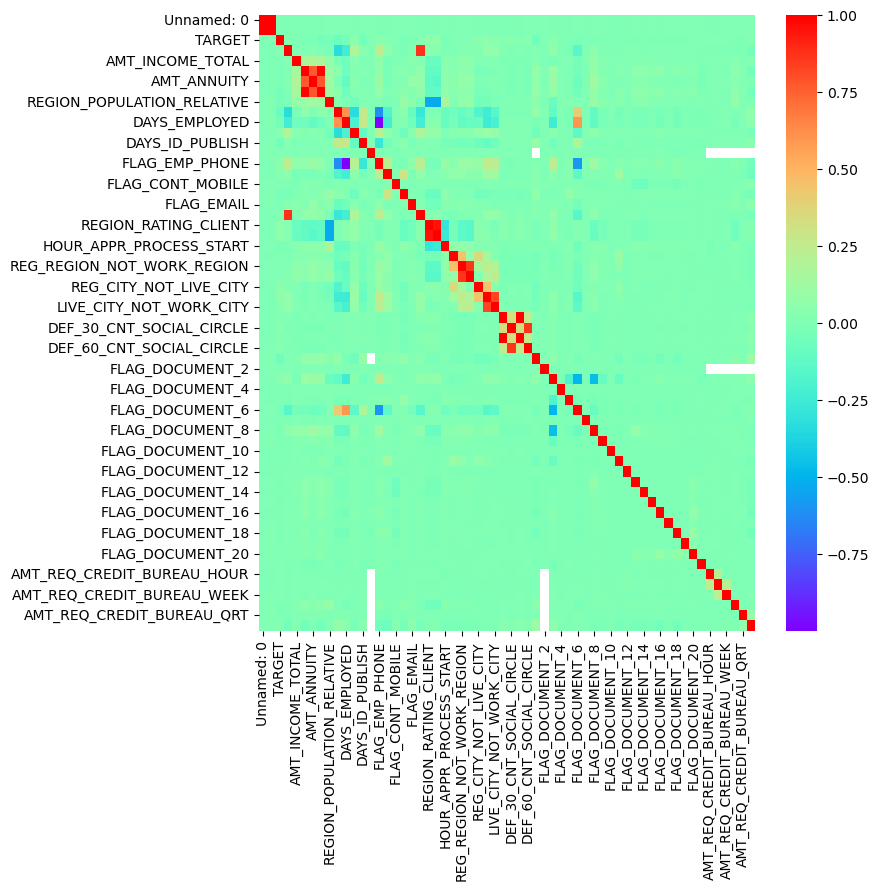

In [3]:
corrmat = application_data.corr() 
  
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="rainbow") 
plt.show()

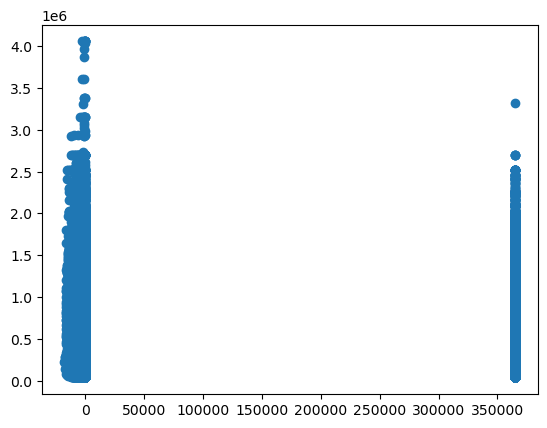

In [64]:
#relationship between numeric variables 
plt.scatter(application_data['DAYS_EMPLOYED'], application_data['AMT_CREDIT'])
plt.show() 

In [65]:
np.corrcoef(application_data['DAYS_EMPLOYED'], application_data['AMT_CREDIT'])

array([[ 1.        , -0.06683834],
       [-0.06683834,  1.        ]])

The value of 0.002 shows a positive but weak linear relationship between the two variables. 

In [66]:
from scipy.stats import linregress
linregress(application_data['DAYS_EMPLOYED'], application_data['AMT_CREDIT'])

LinregressResult(slope=-0.1904205968037303, intercept=611177.698831808, rvalue=-0.0668383409309217, pvalue=2.2768790470443978e-301, stderr=0.005126100259994974, intercept_stderr=794.6470204294436)

In [13]:
columns_appdata = list(application_data.columns)
print(columns_appdata)

['Unnamed: 0', 'SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'F

Since the p-value of 0.2341 is greater than 0.05, we accept the null hypothesis that there is no relationship between the Number of children the client has and Credit amount of the loan

In [15]:
#relationship between categorical variables
pd.crosstab(application_data.FLAG_OWN_REALTY, application_data.TARGET)

TARGET,0,1
FLAG_OWN_REALTY,,
N,86357,7842
Y,196329,16983


The output above shows that applicants with their own house of aparment have a lower probability of defaulting on their loans or having payment difficulties than those without their own house or apartment. To test whether this insight is statistically significant or not, we use the chi-square test of independence.

In [17]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(application_data.FLAG_OWN_REALTY, application_data.TARGET))

(11.57582729808418,
 0.0006681470317545887,
 1,
 array([[ 86594.42593598,   7604.57406402],
        [196091.57406402,  17220.42593598]]))

The second value of the above output — 0.0006681470317545887 -— represents the p-value of the test. 
As evident, the p-value is less than 0.05, hence we reject the null hypothesis that there is a relationship between applicants having their own house and having payment difficulties or defaulting on their payments.


This clearly shows that customers with an educational background or higher degrees have a much lower probability of defaulting on their payments, than those with a lower educational status such as Secondary / secondary special.

###FOR ALL VARIABLES TOGETHER

In [29]:
application_data.ORGANIZATION_TYPE

0         Business Entity Type 3
1                         School
2                     Government
3         Business Entity Type 3
4                       Religion
                   ...          
307506                  Services
307507                       XNA
307508                    School
307509    Business Entity Type 1
307510    Business Entity Type 3
Name: ORGANIZATION_TYPE, Length: 307511, dtype: object

In [27]:
print(columns_appdata)

['Unnamed: 0', 'SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'F

In [30]:
categorical_columns = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 
                       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
                       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'ORGANIZATION_TYPE']



In [32]:
df_cat = application_data[categorical_columns]

In [34]:
df_cat_v1 = df_cat.dropna()
df_cat_v1.shape

(306219, 18)

In [35]:
cat_var1 = ('TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 
                       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
                       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'ORGANIZATION_TYPE')
cat_var2 = ('TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 
                       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
                       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'ORGANIZATION_TYPE')

In [44]:
cat_var_prod = list(itertools.product(cat_var1,cat_var2, repeat = 1))

In [47]:
import scipy.stats as ss

In [48]:
## Creating an empty variable and picking only the p value from the output of Chi-Square test
result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                            df_cat_v1[i[0]], df_cat_v1[i[1]])))[1]))

In [49]:
result

[('TARGET', 'NAME_CONTRACT_TYPE', 1.3210821346035907e-66),
 ('TARGET', 'CODE_GENDER', 5.7018951392156825e-202),
 ('TARGET', 'FLAG_OWN_CAR', 2.0162941238237494e-33),
 ('TARGET', 'FLAG_OWN_REALTY', 0.00022554903355310722),
 ('TARGET', 'NAME_TYPE_SUITE', 1.1329313903575907e-05),
 ('TARGET', 'NAME_INCOME_TYPE', 4.977160476319552e-267),
 ('TARGET', 'NAME_EDUCATION_TYPE', 2.048550759970049e-218),
 ('TARGET', 'NAME_FAMILY_STATUS', 1.7254529122444815e-108),
 ('TARGET', 'NAME_HOUSING_TYPE', 1.2578680791247746e-88),
 ('TARGET', 'FLAG_MOBIL', 1.0),
 ('TARGET', 'FLAG_EMP_PHONE', 1.522466112273338e-143),
 ('TARGET', 'FLAG_WORK_PHONE', 2.3168389869963767e-56),
 ('TARGET', 'FLAG_CONT_MOBILE', 0.8899698286737141),
 ('TARGET', 'FLAG_PHONE', 1.4981802440893694e-39),
 ('TARGET', 'FLAG_EMAIL', 0.35215396103040886),
 ('TARGET', 'ORGANIZATION_TYPE', 5.673740404019712e-299),
 ('NAME_CONTRACT_TYPE', 'TARGET', 1.3210821346035907e-66),
 ('NAME_CONTRACT_TYPE', 'CODE_GENDER', 7.017696587854066e-14),
 ('NAME_CONTR

In [51]:
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 
                                                       'coeff'])
## Using pivot function to convert the above DataFrame into a crosstab
chi_test_output.pivot(index='var1', columns='var2', values='coeff')



var2,CODE_GENDER,FLAG_CONT_MOBILE,FLAG_EMAIL,FLAG_EMP_PHONE,FLAG_MOBIL,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_PHONE,FLAG_WORK_PHONE,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE,ORGANIZATION_TYPE,TARGET
var1,,,,,,,,,,,,,,,,,
CODE_GENDER,NaN,3.691126e-03,2.617471e-23,0.000000e+00,0.381304,0.000000e+00,3.885840e-131,1.862330e-28,9.257788e-82,7.017697e-14,1.056904e-42,0.000000e+00,2.108796e-286,0.000000e+00,3.835251e-261,0.000000e+00,5.701895e-202
FLAG_CONT_MOBILE,3.691126e-03,NaN,4.106330e-03,1.668673e-12,1.000000,2.771457e-04,1.916839e-06,6.529617e-04,1.143736e-32,0.000000e+00,2.356150e-31,1.920322e-04,9.565358e-01,1.732891e-25,3.666185e-03,2.573211e-16,8.899698e-01
FLAG_EMAIL,2.617471e-23,4.106330e-03,NaN,1.565604e-262,1.000000,1.723527e-71,6.860390e-58,8.309681e-16,1.022570e-10,8.251995e-10,0.000000e+00,2.380008e-71,2.504278e-15,0.000000e+00,2.077881e-07,0.000000e+00,3.521540e-01
FLAG_EMP_PHONE,0.000000e+00,1.668673e-12,1.565604e-262,NaN,1.000000,0.000000e+00,0.000000e+00,2.632567e-19,0.000000e+00,3.175914e-200,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.523493e-166,0.000000e+00,1.522466e-143
FLAG_MOBIL,3.813045e-01,1.000000e+00,1.000000e+00,1.000000e+00,NaN,7.358822e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.197609e-06,9.668560e-01,9.997080e-01,9.957892e-01,9.997610e-01,6.134803e-03,1.000000e+00
FLAG_OWN_CAR,0.000000e+00,2.771457e-04,1.723527e-71,0.000000e+00,0.735882,NaN,2.500489e-01,1.362033e-04,5.031647e-12,5.831439e-04,0.000000e+00,0.000000e+00,1.786504e-105,0.000000e+00,2.124955e-120,0.000000e+00,2.016294e-33
FLAG_OWN_REALTY,3.885840e-131,1.916839e-06,6.860390e-58,0.000000e+00,1.000000,2.500489e-01,NaN,2.307682e-121,0.000000e+00,6.872217e-292,1.463198e-58,1.125293e-173,0.000000e+00,0.000000e+00,2.221425e-215,0.000000e+00,2.255490e-04
FLAG_PHONE,1.862330e-28,6.529617e-04,8.309681e-16,2.632567e-19,1.000000,1.362033e-04,2.307682e-121,NaN,0.000000e+00,5.747779e-42,1.071238e-66,1.009921e-59,7.763027e-89,1.268452e-40,8.172090e-18,5.508899e-105,1.498180e-39
FLAG_WORK_PHONE,9.257788e-82,1.143736e-32,1.022570e-10,0.000000e+00,1.000000,5.031647e-12,0.000000e+00,0.000000e+00,NaN,3.983939e-98,4.619360e-21,0.000000e+00,1.077991e-47,0.000000e+00,5.362223e-51,0.000000e+00,2.316839e-56


In [52]:
prev_columns = list(previous_application.columns)
print(prev_columns)

['Unnamed: 0', 'SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [55]:
prev_categorical = previous_application.select_dtypes(include=['object'])

In [57]:
prev_categorical1 = prev_categorical.dropna()
prev_categorical1.shape

(849809, 16)

In [58]:
c = list(prev_categorical1.columns)
print(c)

['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


In [59]:
prev_cat_var1 = ('NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION')
prev_cat_var2 = ('NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION')

In [60]:
prev_cat_var_prod = list(itertools.product(prev_cat_var1,prev_cat_var2, repeat = 1))

In [61]:
## Creating an empty variable and picking only the p value from the output of Chi-Square test
prev_result = []
for i in prev_cat_var_prod:
    if i[0] != i[1]:
        prev_result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                            prev_categorical1[i[0]], prev_categorical1[i[1]])))[1]))

In [63]:
prev_chi_test_output = pd.DataFrame(prev_result, columns = ['var1', 'var2', 
                                                       'coeff'])
## Using pivot function to convert the above DataFrame into a crosstab
prev_chi_test_output.pivot(index='var1', columns='var2', values='coeff') 

var2,CHANNEL_TYPE,CODE_REJECT_REASON,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CLIENT_TYPE,NAME_CONTRACT_STATUS,NAME_CONTRACT_TYPE,NAME_GOODS_CATEGORY,NAME_PAYMENT_TYPE,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,NAME_SELLER_INDUSTRY,NAME_TYPE_SUITE,NAME_YIELD_GROUP,PRODUCT_COMBINATION,WEEKDAY_APPR_PROCESS_START
var1,,,,,,,,,,,,,,,,
CHANNEL_TYPE,NaN,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00
CODE_REJECT_REASON,0.0,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00
FLAG_LAST_APPL_PER_CONTRACT,0.0,0.0,NaN,1.925254e-251,2.758995e-129,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,4.543912e-71,0.0,0.0,1.003664e-23
NAME_CASH_LOAN_PURPOSE,0.0,0.0,1.925254e-251,NaN,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00
NAME_CLIENT_TYPE,0.0,0.0,2.758995e-129,0.000000e+00,NaN,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00
NAME_CONTRACT_STATUS,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00
NAME_CONTRACT_TYPE,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,NaN,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00
NAME_GOODS_CATEGORY,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,NaN,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00
NAME_PAYMENT_TYPE,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.000000e+00,0.0,0.0,3.233746e-115
